In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## 한글 사용을 위한 페키지##
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.width', 1000)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = [[163], [179], [166], [169], [171]]
y = [54, 63, 57, 56, 58]

lr.fit(x,y)

LinearRegression()

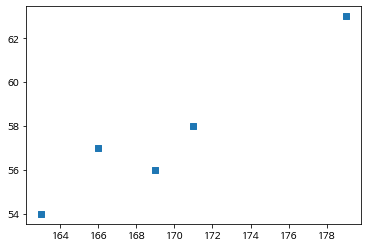

In [6]:
plt.scatter(x,y,marker='s')
plt.show()

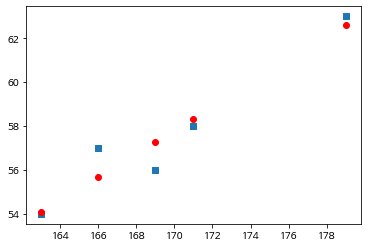

In [7]:
plt.scatter(x,y,marker='s')
y_pred = lr.predict(x)
plt.scatter(x,y_pred, color='red')
plt.show()

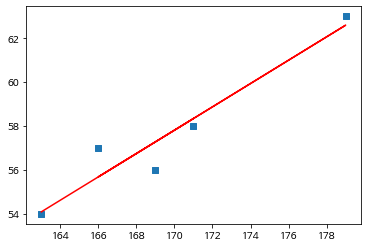

In [8]:
plt.scatter(x,y, marker='s')
y_pred = lr.predict(x)
plt.plot(x,y_pred,'r')
plt.show()

In [9]:
print(lr.score(x,y))
print(lr.coef_, lr.intercept_)

0.9191095132743363
[0.53125] -32.500000000000036


In [11]:
x = [[171,0],[169,0],[176,0],[168,0],[181,0],[166,0],[180,0],[175,0],
     [163,1],[162,1],[171,1],[162,1],[164,1],[162,1],[158,1],[173,1]]
y = [69,65,72,67,71,65,80,71,55,51,59,53,61,56,47,57]

lr.fit(x,y)
print(lr.score(x,y))
print(lr.coef_)

0.8906355513939723
[ 0.66027053 -9.26509909]


In [12]:
test_x = [[168,0],[168,1]]
lr.predict(test_x)

array([66.53357974, 57.26848065])

In [13]:
from sklearn.datasets import load_boston

boston= load_boston()
print(boston.keys())
print(type(boston.data))
print(type(boston.target))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['mid_price'] = boston.target
print(dataset)
print(dataset.info())
print(dataset.duplicated().sum())
print(dataset.isna().sum())

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  mid_price
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98       24.0
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14       21.6
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03       34.7
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94       33.4
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33       36.2
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...        ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   9.67       22.4
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   9.08       20.6
503  0.06076   0.0  11.93   0.0  0.57

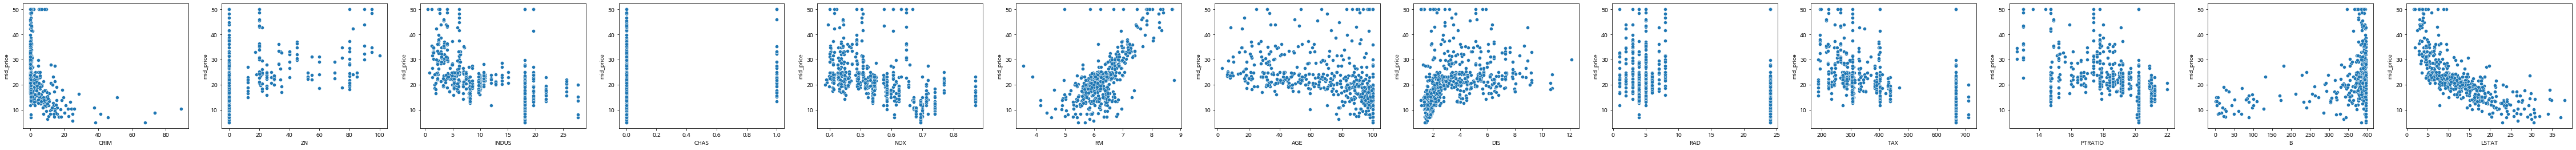

In [15]:
plt.figure(figsize=(80,4))
i = 1
for c in dataset.columns:
  if c != 'mid_price':
    plt.subplot(1, len(dataset.columns)-1, i)
    i = i + 1
    sns.scatterplot(x=c, y='mid_price', data=dataset)
plt.show()

CRIM        -0.388305
ZN           0.360445
INDUS       -0.483725
CHAS         0.175260
NOX         -0.427321
RM           0.695360
AGE         -0.376955
DIS          0.249929
RAD         -0.381626
TAX         -0.468536
PTRATIO     -0.507787
B            0.333461
LSTAT       -0.737663
mid_price    1.000000
Name: mid_price, dtype: float64



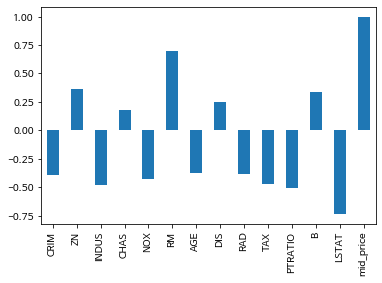

In [16]:
res = dataset.corr()
print(res.loc['mid_price'])
print()
res.loc['mid_price'].plot.bar()
plt.show()

In [17]:
test_set = dataset.iloc[:100]
train_set = dataset.iloc[100:]

train_x = train_set.drop(['mid_price'], axis=1)
train_y = train_set['mid_price']

test_x = test_set.drop(['mid_price'], axis = 1)
test_y = test_set['mid_price']

0.7465346879380911


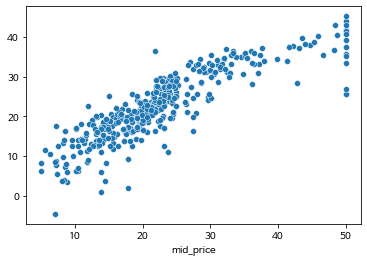

In [20]:
lr = LinearRegression()
lr.fit(train_x, train_y)

print(lr.score(train_x, train_y))

pred = lr.predict(train_x)
sns.scatterplot(x = train_y, y=pred)
plt.show()

0.6377771855934954


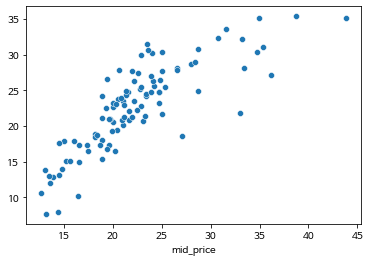

In [21]:
print(lr.score(test_x, test_y))

pred = lr.predict(test_x)
sns.scatterplot(x = test_y, y = pred)
plt.show()

In [22]:
for i in range(len(train_x.columns)):
  print(train_x.columns[i], ":\t", lr.coef_[i]*1000)

CRIM :	 -109.12483869914173
ZN :	 58.89962982722602
INDUS :	 53.21431135979127
CHAS :	 2531.364351313172
NOX :	 -21159.335829429976
RM :	 3282.285403572024
AGE :	 -4.043961150022982
DIS :	 -1783.2976866029417
RAD :	 318.7746940849711
TAX :	 -12.518088641898517
PTRATIO :	 -1011.8621860050716
B :	 9.287793522139841
LSTAT :	 -581.7562680136233


In [24]:
#print(type(lr.coef_)) #<class 'numpy.ndarray'>
coef = pd.Series(data=lr.coef_, index=train_x.columns) * 1000
print(coef.sort_values(ascending=False))

RM          3282.285404
CHAS        2531.364351
RAD          318.774694
ZN            58.899630
INDUS         53.214311
B              9.287794
AGE           -4.043961
TAX          -12.518089
CRIM        -109.124839
LSTAT       -581.756268
PTRATIO    -1011.862186
DIS        -1783.297687
NOX       -21159.335829
dtype: float64


In [29]:
dataset2 = dataset.drop(['ZN','INDUS', 'B', 'AGE', 'TAX'], axis=1)
#dataset2 = dataset[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'mid_price']]
train_set = dataset2.iloc[100:]
test_set = dataset2.iloc[:100]

train_x = train_set.drop(['mid_price'], axis=1)
train_y = train_set['mid_price']

test_x = test_set.drop(['mid_price'], axis = 1)
test_y = test_set['mid_price']

In [30]:
lr.fit(train_x,train_y)
print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

0.7276877334642399
0.6429009228353522
